In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
# Read the CSV file
df_raw = pd.read_csv("/Users/bercinersoz/Desktop/HSOS_Market_merged_data.csv", delimiter=",", low_memory=False)


In [65]:
df_raw.columns

Index(['Year', 'Month', 'Governorate', 'Governorate p-code', 'District',
       'District p-code', 'Sub-district', 'Sub-district p-code', 'Community',
       'Community p-code',
       ...
       'What was the third top priority need for the IDP population in the assessed location?_WASH',
       'What was the third top priority need for the IDP population in the assessed location?_Winterisation',
       'Date', 'month2', 'admin1Name_en', 'admin3Name_en', 'Price_SMEB_food',
       'Price_SMEB_cookingfuels', 'Price_SMEB_water', 'Price_SMEB_gbdata'],
      dtype='object', length=989)

In [66]:
df = df_raw.copy()

In [67]:

df = df.drop(columns=[
    'Year', 'Month', 'Governorate', 'Governorate p-code', 'District',
    'District p-code', 'Sub-district', 'Sub-district p-code', 'Community',
    'Community p-code', 'Date', 'month2', 'admin1Name_en', 'admin3Name_en'
])


In [68]:
df.head()

,Returnees reported in the community,Three most common IDP shelter types - Solid finished apartment,Three most common IDP shelter types - Hotel,Three most common IDP shelter types - Unfinished or abandoned residential building,Three most common IDP shelter types - Damaged residential building,Three most common IDP shelter types - Non residential structure with one family,Three most common IDP shelter types - Collective center with more than one family,Three most common IDP shelter types - Concrete block shelter,Three most common IDP shelter types - Container,Three most common IDP shelter types - Tent,...,What was the third top priority need for the IDP population in the assessed location?_No Data,What was the third top priority need for the IDP population in the assessed location?_Protection,What was the third top priority need for the IDP population in the assessed location?_Shelter,What was the third top priority need for the IDP population in the assessed location?_Summer items,What was the third top priority need for the IDP population in the assessed location?_WASH,What was the third top priority need for the IDP population in the assessed location?_Winterisation,Price_SMEB_food,Price_SMEB_cookingfuels,Price_SMEB_water,Price_SMEB_gbdata
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,142.4272,2.50,4.158,4.8252
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,142.4272,2.50,4.158,4.8252
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,142.4272,2.50,4.158,4.8252
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,142.4272,2.50,4.158,4.8252
4,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,158.6600,2.24,5.400,4.4000


In [69]:
assistance_columns = [
    col for col in df.columns 
    if col.startswith("Humanitarian assistance provided to IDP") and pd.api.types.is_numeric_dtype(df[col])
]


In [70]:
assistance_columns

['Humanitarian assistance provided to IDP households in the community over the last 30 days - Shelter',
 'Humanitarian assistance provided to IDP households in the community over the last 30 days - Health',
 'Humanitarian assistance provided to IDP households in the community over the last 30 days - NFIs',
 'Humanitarian assistance provided to IDP households in the community over the last 30 days - Electricity assistance',
 'Humanitarian assistance provided to IDP households in the community over the last 30 days - Food, nutrition',
 'Humanitarian assistance provided to IDP households in the community over the last 30 days - Agricultural supplies',
 'Humanitarian assistance provided to IDP households in the community over the last 30 days - Livelihood support',
 'Humanitarian assistance provided to IDP households in the community over the last 30 days - Education',
 'Humanitarian assistance provided to IDP households in the community over the last 30 days - WASH',
 'Humanitarian assist

In [71]:
# Train_ Test Split

In [74]:
# Extract the target DataFrame
target = df[assistance_columns]

# Simplify the column names for better readability
simplified_labels = {col: col.split(" - ")[-1] for col in assistance_columns}

# Rename columns in the target DataFrame
target = target.rename(columns=simplified_labels)

df_feature = df.drop(columns=(assistance_columns))

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(df_feature, target, test_size=0.2, random_state=1234)

# Applying 20% missing threshold

In [76]:
# Apply 20% missing threshold to X_train
missing_threshold = 0.2

# Calculate the percentage of missing values per column in X_train
missing_percentage = X_train.isnull().mean()

# Drop columns with more than 20% missing values
columns_to_keep = missing_percentage[missing_percentage <= missing_threshold].index
X_train = X_train[columns_to_keep]

# Ensure X_test uses the same columns as X_train
X_test = X_test[columns_to_keep]

# Print the remaining columns after applying the threshold
print(f"Remaining columns in X_train after applying 20% missing threshold: {len(columns_to_keep)}")

Remaining columns in X_train after applying 20% missing threshold: 789


# Normalize Varibles

In [77]:
# Find columns in X_train where any value is greater than 1
columns_with_values_greater_than_one = X_train.columns[(X_train > 1).any()].tolist()

# Print the list of columns
print("Columns with values greater than 1:", columns_with_values_greater_than_one)


Columns with values greater than 1: ['Proportion of IDPs living in overcrowded shelters', 'Shelter occupancy situation - Proportion of IDPs that own their shelter', 'Shelter occupancy situation - Proportion of IDPs that rent their shelter', 'Shelter occupancy situation - Proportion of IDPs that are hosted for free', 'Shelter occupancy situation - Proportion of IDPs that squat', 'Shelter occupancy situation - Proportion of resident population that own their shelter', 'Shelter occupancy situation - Proportion of resident population that rent their shelter', 'Shelter occupancy situation - Proportion of resident population that are hosted for free', 'Shelter occupancy situation - Proportion of resident population that squat', 'Proportion of shelters with no damage', 'Proportion of shelters with minor damage', 'Proportion of shelters with major damage', 'Proportion of shelters with severe damage', 'Proportion of shelters completely destroyed', 'Average price of rent for a 2 bedroom apartmen

In [78]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to scale
columns_to_scale = ['Proportion of IDPs living in overcrowded shelters', 
                    'Shelter occupancy situation - Proportion of IDPs that own their shelter',
                    'Shelter occupancy situation - Proportion of IDPs that rent their shelter',
                    'Shelter occupancy situation - Proportion of IDPs that are hosted for free',
                    'Shelter occupancy situation - Proportion of IDPs that squat',
                    'Shelter occupancy situation - Proportion of resident population that own their shelter',
                    'Shelter occupancy situation - Proportion of resident population that rent their shelter',
                    'Shelter occupancy situation - Proportion of resident population that are hosted for free',
                    'Shelter occupancy situation - Proportion of resident population that squat',
                    'Proportion of shelters with no damage',
                    'Proportion of shelters with minor damage',
                    'Proportion of shelters with major damage',
                    'Proportion of shelters with severe damage',
                    'Proportion of shelters completely destroyed',
                    'Average price of rent for a 2 bedroom apartment in the last 30 days',
                    'Average number of hours with access to electricity per day for households in the assessed location over the last 30 days',
                    'Average monthly expenditure for water for a household of 6 people in the last 30 days',
                    'Proportion of households with access to sufficient water over the last 30 days',
                    'Estimated daily wage for unskilled labour for IDPs in the assessed community',
                    'Price_SMEB_food',
                    'Price_SMEB_cookingfuels',
                    'Price_SMEB_gbdata']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns in X_train
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Apply the same transformation to X_test using the scaler fitted on X_train
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Check the scaled values
print(X_train[columns_to_scale].head())


       Proportion of IDPs living in overcrowded shelters  \
21051                                                NaN   
235                                                  NaN   
26613                                                0.0   
4145                                                 0.0   
25285                                                0.4   

       Shelter occupancy situation - Proportion of IDPs that own their shelter  \
21051                                                0.0                         
235                                                  0.0                         
26613                                                0.0                         
4145                                                 0.0                         
25285                                                0.0                         

       Shelter occupancy situation - Proportion of IDPs that rent their shelter  \
21051                                           0.727273       

In [178]:
X_train.columns[(X_train > 1).any()].tolist()

[]

# VarianceThreshold (If 99% same remove from the Dataset

In [211]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold
selector = VarianceThreshold(threshold=0.01)

# Fit and transform
selector.fit(X_train)
X_train_reduced = pd.DataFrame(selector.transform(X_train), columns=X_train.columns[selector.get_support()])
X_test_reduced = pd.DataFrame(selector.transform(X_test), columns=X_train.columns[selector.get_support()])

# Results
print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features: {X_train_reduced.shape[1]}")


TypeError: VarianceThreshold.__init__() got an unexpected keyword argument 'random_state'

In [80]:
X_train = X_train_reduced
X_train.columns

Index(['Returnees reported in the community',
       'Three most common IDP shelter types - Solid finished apartment',
       'Three most common IDP shelter types - Unfinished or abandoned residential building',
       'Three most common IDP shelter types - Damaged residential building',
       'Three most common IDP shelter types - Non residential structure with one family',
       'Three most common IDP shelter types - Collective center with more than one family',
       'Three most common IDP shelter types - Tent',
       'Proportion of IDPs living in overcrowded shelters',
       'IDP shelter inadequacies - Lack of lighting inside shelter',
       'IDP shelter inadequacies - Lack of lighting around shelter',
       ...
       'What was the third top priority need for the IDP population in the assessed location?_Food',
       'What was the third top priority need for the IDP population in the assessed location?_Health',
       'What was the third top priority need for the IDP popula

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Filter features with high VIF (e.g., VIF > 5)
high_vif_features = vif_data[vif_data["VIF"] > 5]

# Display results
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)

if not high_vif_features.empty:
    print("\nFeatures with high multicollinearity (VIF > 5):")
    print(high_vif_features)
else:
    print("\nNo features found with high VIF (VIF > 5).")



Variance Inflation Factor (VIF) for each feature:
                                               Feature        VIF
0                  Returnees reported in the community   1.987180
1    Three most common IDP shelter types - Solid fi...   2.011676
2    Three most common IDP shelter types - Unfinish...   2.183902
3    Three most common IDP shelter types - Damaged ...   1.524583
4    Three most common IDP shelter types - Non resi...   1.177676
..                                                 ...        ...
492  What was the third top priority need for the I...   5.296372
493  What was the third top priority need for the I...   9.436195
494  What was the third top priority need for the I...  14.650303
495  What was the third top priority need for the I...  13.461860
496                                    Price_SMEB_food   2.843287

[497 rows x 2 columns]

Features with high multicollinearity (VIF > 5):
                                               Feature        VIF
22   Shelter occupa

In [81]:
X_test = X_test_reduced
X_test.columns

Index(['Returnees reported in the community',
       'Three most common IDP shelter types - Solid finished apartment',
       'Three most common IDP shelter types - Unfinished or abandoned residential building',
       'Three most common IDP shelter types - Damaged residential building',
       'Three most common IDP shelter types - Non residential structure with one family',
       'Three most common IDP shelter types - Collective center with more than one family',
       'Three most common IDP shelter types - Tent',
       'Proportion of IDPs living in overcrowded shelters',
       'IDP shelter inadequacies - Lack of lighting inside shelter',
       'IDP shelter inadequacies - Lack of lighting around shelter',
       ...
       'What was the third top priority need for the IDP population in the assessed location?_Food',
       'What was the third top priority need for the IDP population in the assessed location?_Health',
       'What was the third top priority need for the IDP popula

In [85]:
# Verify changes
print("Y_train columns:", Y_train.columns.tolist())
print(Y_train.head())

Y_train columns: ['Shelter', 'Health', 'NFIs', 'Electricity assistance', 'Food, nutrition', 'Agricultural supplies', 'Livelihood support', 'Education', 'WASH', 'Winterisation', 'Legal services', 'GBV services', 'CP services', 'Explosive hazard risk awareness or removal of explosive contamination', 'Mental health psychological support', 'Cash assistance vouchers or cash in hand']
       Shelter  Health  NFIs  Electricity assistance  Food, nutrition  \
21051      0.0     1.0   0.0                     0.0              1.0   
235        0.0     0.0   0.0                     0.0              0.0   
26613      0.0     0.0   0.0                     0.0              1.0   
4145       0.0     0.0   0.0                     0.0              0.0   
25285      0.0     0.0   0.0                     0.0              0.0   

       Agricultural supplies  Livelihood support  Education  WASH  \
21051                    0.0                 0.0        0.0   0.0   
235                      0.0             

# Imputing Missing Values

In [82]:
from sklearn.impute import KNNImputer

# Save the original feature names from X_train
original_feature_names = X_train.columns.tolist()  # Save column names before imputation

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation (returns a NumPy array)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert back to DataFrame with original column names
X_train = pd.DataFrame(X_train_imputed, columns=original_feature_names, index=X_train.index)
X_test = pd.DataFrame(X_test_imputed, columns=original_feature_names, index=X_test.index)

# Verify the result
print(type(X_train))  # Should now be a DataFrame
print(X_train.columns)  # Should display column names




<class 'pandas.core.frame.DataFrame'>
Index(['Returnees reported in the community',
       'Three most common IDP shelter types - Solid finished apartment',
       'Three most common IDP shelter types - Unfinished or abandoned residential building',
       'Three most common IDP shelter types - Damaged residential building',
       'Three most common IDP shelter types - Non residential structure with one family',
       'Three most common IDP shelter types - Collective center with more than one family',
       'Three most common IDP shelter types - Tent',
       'Proportion of IDPs living in overcrowded shelters',
       'IDP shelter inadequacies - Lack of lighting inside shelter',
       'IDP shelter inadequacies - Lack of lighting around shelter',
       ...
       'What was the third top priority need for the IDP population in the assessed location?_Food',
       'What was the third top priority need for the IDP population in the assessed location?_Health',
       'What was the thir

# Saving Manipulated Data

In [209]:
X_train.shape

(26329, 497)

In [210]:
X_test.shape

(6583, 497)

In [207]:
# Reconstruct full dataset
X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y_full = pd.concat([Y_train, Y_test], axis=0).reset_index(drop=True)

# Merge back features and target variables
data_to_ML_model = pd.concat([X_full, y_full], axis=1)

# Save to a file
data_to_ML_model.to_csv("/Users/bercinersoz/Desktop/data_to_ML_model.csv", index=False)



In [212]:
data_to_ML_model


,Returnees reported in the community,Three most common IDP shelter types - Solid finished apartment,Three most common IDP shelter types - Unfinished or abandoned residential building,Three most common IDP shelter types - Damaged residential building,Three most common IDP shelter types - Non residential structure with one family,Three most common IDP shelter types - Collective center with more than one family,Three most common IDP shelter types - Tent,Proportion of IDPs living in overcrowded shelters,IDP shelter inadequacies - Lack of lighting inside shelter,IDP shelter inadequacies - Lack of lighting around shelter,...,Livelihood support,Education,WASH,Winterisation,Legal services,GBV services,CP services,Explosive hazard risk awareness or removal of explosive contamination,Mental health psychological support,Cash assistance vouchers or cash in hand
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32909,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32910,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Logistic Regression

Multi-label Context: Hamming Loss evaluates multi-label classification models by penalizing every incorrect label prediction, providing fine-grained feedback. 
Interpretation
Range: Hamming Loss ranges from 0 to 1.

0: Perfect prediction (all labels are correctly predicted for all samples).
1: Completely incorrect predictions (all labels are wrong for all samples).
Lower is Better: A lower Hamming Loss indicates better model performance.

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, hamming_loss, classification_report

# Define the base logistic regression model
# Wrap the logistic regression model with MultiOutputClassifier

logistic_model = MultiOutputClassifier(
    LogisticRegression(random_state=1234, max_iter=1000, n_jobs=-1)
)
# Train the logistic regression model
logistic_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred)}")

# Update assistance_columns to reflect the renamed target columns
simplified_assistance_columns = list(target.columns)  # Extract renamed column names from `target`

# Generate and print the classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=simplified_assistance_columns))

Evaluation Metrics:
Hamming Loss: 0.029336928452073523
Exact Match Accuracy: 0.6922375816497038
Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.36      0.17      0.23        52
                                                               Health       0.86      0.83      0.84      1614
                                                                 NFIs       0.64      0.26      0.37        81
                                               Electricity assistance       0.61      0.41      0.49        46
                                                      Food, nutrition       0.85      0.90      0.88      2813
                                                Agricultural supplies       0.22      0.04      0.07        50
                                                   Livelihood support       0.55      0.30      0.39   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _

# Random Forest

## When Multicollinearity, RF is Robust technic.

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base classifier
random_forest_model = MultiOutputClassifier(RandomForestClassifier(random_state=1234, n_estimators=100, n_jobs=-1))

# Train the model on X_train and Y_train
random_forest_model.fit(X_train, Y_train)

# Predict on X_test
Y_pred_random_forest = random_forest_model.predict(X_test)


# Evaluate the model
print("Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_random_forest)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_random_forest)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_random_forest, target_names=simplified_assistance_columns))

Evaluation Metrics:
Hamming Loss: 0.021551724137931036
Exact Match Accuracy: 0.759684034634665
Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.50      0.06      0.10        52
                                                               Health       0.94      0.88      0.91      1614
                                                                 NFIs       0.93      0.17      0.29        81
                                               Electricity assistance       1.00      0.24      0.39        46
                                                      Food, nutrition       0.90      0.92      0.91      2813
                                                Agricultural supplies       1.00      0.02      0.04        50
                                                   Livelihood support       0.79      0.18      0.30    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _

In [91]:
print("Samples with no true labels:", (Y_test.sum(axis=1) == 0).sum())


Samples with no true labels: 2759


In [92]:
print("Samples with no predicted labels:", (Y_pred.sum(axis=1) == 0).sum())


Samples with no predicted labels: 2967


# Naive Bayes
A probabilistic model that works well for binary and multi-label classification, especially if features are conditionally independent. (our model does not have indep features)

In [93]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes classifier
nb_model = MultiOutputClassifier(
    MultinomialNB(alpha=0.1)  # Smoothing parameter to handle zero probabilities
)

# Train the model
nb_model.fit(X_train, Y_train)

# Predict
Y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("Naive Bayes - Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_nb)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_nb)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_nb, target_names=simplified_assistance_columns, zero_division=0))



Naive Bayes - Evaluation Metrics:
Hamming Loss: 0.10067598359410602
Exact Match Accuracy: 0.38401944402248217
Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.04      0.54      0.07        52
                                                               Health       0.52      0.82      0.64      1614
                                                                 NFIs       0.06      0.52      0.11        81
                                               Electricity assistance       0.12      0.54      0.20        46
                                                      Food, nutrition       0.67      0.79      0.73      2813
                                                Agricultural supplies       0.05      0.30      0.09        50
                                                   Livelihood support       0.15      0.3

# Support Vector Machine

In [233]:
from sklearn.svm import LinearSVC

# Initialize SVM classifier with optimized parameters
svm_model_base = MultiOutputClassifier(
    LinearSVC(random_state=1234, C=1.0, max_iter=5000)  # Increased iterations for convergence
)

# Train the model
svm_model_base.fit(X_train, Y_train)

# Predict
Y_pred_svm_base = svm_model_base.predict(X_test)

# Evaluate
print("SVM - Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_svm_base)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_svm_base)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_svm_base, target_names=simplified_assistance_columns, zero_division=0))


SVM - Evaluation Metrics:
Hamming Loss: 0.03039077927996354
Exact Match Accuracy: 0.685857511772748
Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.28      0.27      0.27        52
                                                               Health       0.86      0.83      0.85      1614
                                                                 NFIs       0.71      0.25      0.37        81
                                               Electricity assistance       0.30      0.35      0.32        46
                                                      Food, nutrition       0.85      0.91      0.88      2813
                                                Agricultural supplies       0.15      0.04      0.06        50
                                                   Livelihood support       0.53      0.30      0.3

# K-Nearest Neighbors 

In [97]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier with optimized parameters
knn_model = MultiOutputClassifier(
    KNeighborsClassifier(
        n_neighbors=5,      # Use 5 nearest neighbors
        weights="distance", # Weight neighbors by distance
        n_jobs=-1           # Utilize all available CPU cores
    )
)

# Train the model
knn_model.fit(X_train, Y_train)

# Predict
Y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("KNN - Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_knn)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_knn)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_knn, target_names=simplified_assistance_columns, zero_division=0))


KNN - Evaluation Metrics:
Hamming Loss: 0.026070940300774722
Exact Match Accuracy: 0.6913261430958529
Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.47      0.17      0.25        52
                                                               Health       0.90      0.87      0.89      1614
                                                                 NFIs       0.84      0.26      0.40        81
                                               Electricity assistance       0.71      0.43      0.54        46
                                                      Food, nutrition       0.87      0.82      0.85      2813
                                                Agricultural supplies       0.75      0.06      0.11        50
                                                   Livelihood support       0.68      0.33      0

# Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier with optimized parameters
tree_model = MultiOutputClassifier(
    DecisionTreeClassifier(
        random_state=1234,
        max_depth=15,            # Limit tree depth to prevent overfitting
        min_samples_split=10     # Require more samples to split
    )
)

# Train the model
tree_model.fit(X_train, Y_train)

# Predict
Y_pred_tree = tree_model.predict(X_test)

# Evaluate
print("Decision Tree - Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_tree)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_tree)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_tree, target_names=simplified_assistance_columns, zero_division=0))


Decision Tree - Evaluation Metrics:
Hamming Loss: 0.030998404982530762
Exact Match Accuracy: 0.6867689503265988
Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.30      0.19      0.24        52
                                                               Health       0.86      0.84      0.85      1614
                                                                 NFIs       0.47      0.27      0.34        81
                                               Electricity assistance       0.59      0.48      0.53        46
                                                      Food, nutrition       0.86      0.89      0.88      2813
                                                Agricultural supplies       0.26      0.18      0.21        50
                                                   Livelihood support       0.46      0

# Models Overview: Usage, Suitability, Advantages, and Disadvantages**

#### **1. Logistic Regression** 
  - Simple classification problems with linear relationships between features and targets.
  - Multi-label problems where interpretability is key.
  - Works for your dataset as a baseline model to compare against more complex ones.
  - Struggles with non-linear relationships.
  - Performance may decline for complex datasets.

#### **2. Random Forest**
  - Complex datasets with non-linear relationships and high feature interaction.
  - Problems requiring robust performance with default settings.
  - Ideal for your dataset due to its ability to handle multi-label classification and large feature sets.
  - Handles non-linear relationships well.
  - Robust to overfitting with proper tuning.
  - Provides feature importance for interpretability.
  - May require hyperparameter tuning for optimal results.

#### **3. Naive Bayes**
  - Problems with sparse or high-dimensional data.
  - Situations with strong feature independence assumptions.
- **Suitability:** 
  - Limited for your dataset unless features are sparse and independent.
- **Advantages:**
  - Extremely fast and efficient on large datasets.
  - Handles imbalanced datasets well.
- **Disadvantages:**
  - Assumes feature independence, which may not hold in your dataset.
  - Struggles with continuous numerical features.

#### **4. Support Vector Machines (SVM)**
  - High-dimensional datasets with small-to-moderate size.
  - Problems requiring robust performance with few outliers.
- **Advantages:**
  - Handles high-dimensional data well.
  - Effective in complex, non-linear problems with the right kernel.
- **Disadvantages:**
  - Slow training for large datasets.
  - Requires careful kernel and hyperparameter selection.


#### **5. K-Nearest Neighbors (KNN)**
  - Problems where instance-based learning is appropriate.
  - Smaller datasets with clear cluster separation.
- **Advantages:**
  - No training phase; simple to implement.
  - Effective for datasets with low noise.
- **Disadvantages:**
  - Very slow prediction for large datasets.
  - Sensitive to irrelevant features and scaling.

#### **6. Decision Tree**
  - Problems requiring simple, interpretable models.
  - Smaller datasets with fewer features.
- **Suitability:** 
  - Useful as a benchmark for your dataset but may overfit.
- **Advantages:**
  - Easy to interpret and visualize.
  - Handles non-linear relationships well.
- **Disadvantages:**
  - Prone to overfitting on noisy data.
  - Less robust than ensemble methods like Random Forest.


### **Recommendations
- **Best Fit Models:**
  - **Random Forest:** Strong performance on multi-label problems with non-linear features.
  - **Logistic Regression:** Reliable baseline model for comparison.
- **Limited Use:**
  - **KNN, SVM, and Naive Bayes:** May struggle with dataset size or feature dependencies. 


# Model Evaluation

In [111]:
from sklearn.metrics import hamming_loss, accuracy_score, f1_score, classification_report

# Define model names and their corresponding predictions
models = {
    "Logistic Regression": Y_pred,
    "Random Forest": Y_pred_random_forest,
    "Naive Bayes": Y_pred_nb,
    "SVM": Y_pred_svm,
    "KNN": Y_pred_knn,
    "Decision Tree": Y_pred_tree
}

# Initialize a dictionary to store results for each label and model
results_per_label = []


# Loop through models and compute metrics for each label
for model_name, Y_pred in models.items():
    for i, label in enumerate(simplified_assistance_columns):
        metrics = {
            "Label": label,
            "Model": model_name,
            "Hamming Loss": hamming_loss(Y_test.iloc[:, i], Y_pred[:, i]),
            "Accuracy": accuracy_score(Y_test.iloc[:, i], Y_pred[:, i]),
            "F1-Score": f1_score(Y_test.iloc[:, i], Y_pred[:, i], average="binary", zero_division=0)
        }
        results_per_label.append(metrics)

# Convert results into a DataFrame
comparison_df_per_label = pd.DataFrame(results_per_label)

# Pivot the DataFrame so each label is a row and each metric is a column
pivoted_df = comparison_df_per_label.pivot_table(
    index="Label", 
    columns="Model", 
    values=["Hamming Loss", "Accuracy", "F1-Score"]
)

# Flatten the multi-level columns for readability
pivoted_df.columns = [f"{metric} ({model})" for metric, model in pivoted_df.columns]

# Reset the index to make the DataFrame more readable
pivoted_df = pivoted_df.reset_index()


                                                Label  \
0                               Agricultural supplies   
1                                         CP services   
2            Cash assistance vouchers or cash in hand   
3                                           Education   
4                              Electricity assistance   
5   Explosive hazard risk awareness or removal of ...   
6                                     Food, nutrition   
7                                        GBV services   
8                                              Health   
9                                      Legal services   
10                                 Livelihood support   
11                Mental health psychological support   
12                                               NFIs   
13                                            Shelter   
14                                               WASH   
15                                      Winterisation   

    Accuracy (Decision Tree)  

In [113]:
pivoted_df.to_excel("/Users/bercinersoz/Desktop/evaluation_metrics.xlsx")

# Gridsearch OPTIMIZATION

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import make_scorer, f1_score

# Define F1 macro scorer for multi-label classification
f1_macro_scorer = make_scorer(f1_score, average="macro", zero_division=0)


param_grid_rf = {
    "estimator__n_estimators": [100, 200],  # Trees (200 max to balance time & accuracy)
    "estimator__max_depth": [10, 20, None],  # Depth limit to prevent overfitting
    "estimator__min_samples_split": [2, 5]  # Prevents splits on very small samples
}


param_grid_svm = {
    "estimator__C": [0.1, 1, 10],  # Regularization trade-off  
    "estimator__kernel": ["rbf", "linear"]  # Linear = fast, RBF = non-linear
}

param_grid_xgb = {
    "estimator__n_estimators": [100, 200],  # More boosting rounds = better learning
    "estimator__max_depth": [6, 10],  # Prevents overfitting
    "estimator__learning_rate": [0.01, 0.1]  # Step size for updates
}

# Initialize models with MultiOutputClassifier
rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=1234, n_jobs=-1))
svm_model = MultiOutputClassifier(SVC(random_state=1234))
xgb_model = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=1234))

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring=f1_macro_scorer, cv=3, n_jobs=-1, verbose=1)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, scoring=f1_macro_scorer, cv=3, n_jobs=-1, verbose=1)
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring=f1_macro_scorer, cv=3, n_jobs=-1, verbose=1)

# Fit models (this will take time)
grid_search_rf.fit(X_train, Y_train)
grid_search_svm.fit(X_train, Y_train)
grid_search_xgb.fit(X_train, Y_train)

# Best parameters
print("Best RF Parameters:", grid_search_rf.best_params_)
print("Best SVM Parameters:", grid_search_svm.best_params_)
print("Best XGB Parameters:", grid_search_xgb.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src

Best RF Parameters: {'estimator__max_depth': 20, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
Best SVM Parameters: {'estimator__C': 10, 'estimator__kernel': 'rbf'}
Best XGB Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 10, 'estimator__n_estimators': 200}


In [218]:
"""Best RF Parameters: {'estimator__max_depth': 20, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
Best SVM Parameters: {'estimator__C': 10, 'estimator__kernel': 'rbf'}
Best XGB Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 10, 'estimator__n_estimators': 200}"""

"Best RF Parameters: {'estimator__max_depth': 20, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}\nBest SVM Parameters: {'estimator__C': 10, 'estimator__kernel': 'rbf'}\nBest XGB Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 10, 'estimator__n_estimators': 200}"

Why is XGBoost Powerful?
✅ Handles Large Feature Spaces Well (Like your 495 features)
✅ Performs Well on Imbalanced Data (With proper tuning)
✅ Faster than Traditional Boosting (Thanks to parallelization)
✅ Handles Missing Values Automatically
✅ Has Built-in Regularization (Reduces overfitting better than Random Forest)

For multi-label classification with imbalanced data, use AUC-PR (aucpr) over logloss.

aucpr (Area Under Precision-Recall Curve) → Better for imbalanced labels since it focuses on positive class performance.
logloss (Logarithmic Loss) → Good for probabilistic models, but penalizes confident wrong predictions.

# Comparison of Best Models (Tuned hyperparameters)

In [294]:
# Train Random Forest with best parameters
best_rf = MultiOutputClassifier(
    RandomForestClassifier(
        max_depth=20, min_samples_split=2, n_estimators=200, random_state=1234, n_jobs=-1
    )
)
best_rf.fit(X_train, Y_train)

# Train SVM with best parameters
best_svm = MultiOutputClassifier(
    SVC(C=10, kernel="rbf", random_state=1234)
)
best_svm.fit(X_train, Y_train)

# Train XGBoost with best parameters
best_xgb = MultiOutputClassifier(
    XGBClassifier(
        learning_rate=0.1, max_depth=10, n_estimators=200, use_label_encoder=False, eval_metric="logloss", random_state=1234
    )
)
best_xgb.fit(X_train, Y_train)


MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=10,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=1234, ...))

In [295]:

# Make predictions
Y_pred_rf_best = best_rf.predict(X_test)
Y_pred_svm_best = best_svm.predict(X_test)
Y_pred_xgb_best = best_xgb.predict(X_test)

# Store results
results = {}

for name, Y_pred in zip(["Random Forest", "SVM", "XGBoost"], [Y_pred_rf_best, Y_pred_svm_best, Y_pred_xgb_best]):
    results[name] = {
        "Hamming Loss": hamming_loss(Y_test, Y_pred),
        "F1-Score (Macro)": f1_score(Y_test, Y_pred, average="macro", zero_division=0),
        "F1-Score (Micro)": f1_score(Y_test, Y_pred, average="micro", zero_division=0),
        "Accuracy": accuracy_score(Y_test, Y_pred),
    }

# Convert results to DataFrame and display

results_df = pd.DataFrame(results).T
print(results_df)


               Hamming Loss  F1-Score (Macro)  F1-Score (Micro)  Accuracy
Random Forest      0.021799          0.456789          0.825133  0.758013
SVM                0.020194          0.592332          0.846237  0.771229
XGBoost            0.019463          0.599793          0.850648  0.783381


In [296]:
print("\nXGBoost (Best) - Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_xgb_best)}")
print(f"F1-Score (Macro): {f1_score(Y_test, Y_pred_xgb_best, average='macro', zero_division=0)}")
print(f"F1-Score (Micro): {f1_score(Y_test, Y_pred_xgb_best, average='micro', zero_division=0)}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_xgb_best)}")

# Classification Report 
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_xgb_best, target_names=Y_test.columns, zero_division=0))


XGBoost (Best) - Evaluation Metrics:
Hamming Loss: 0.01946301078535622
F1-Score (Macro): 0.599792953882815
F1-Score (Micro): 0.8506484044878333
Accuracy: 0.7833814370347866

Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.53      0.17      0.26        52
                                                               Health       0.92      0.91      0.92      1614
                                                                 NFIs       0.81      0.27      0.41        81
                                               Electricity assistance       0.92      0.52      0.67        46
                                                      Food, nutrition       0.89      0.94      0.92      2813
                                                Agricultural supplies       0.86      0.12      0.21        50
                        

In [235]:
import joblib

# Save models
joblib.dump(logistic_model, "logistic_model.pkl")
joblib.dump(random_forest_model, "random_forest_model.pkl")
joblib.dump(svm_model_base, "svm_model_base.pkl")

joblib.dump(best_rf, "random_forest_optimized.pkl")
joblib.dump(best_svm, "svm_model_optimized.pkl")
joblib.dump(best_xgb, "xgboost_model_optimized.json")  # XGBoost has a better format


['xgboost_model_optimized.json']

In [251]:
import joblib
import xgboost as xgb

# ✅ XGBoost modelini .json yerine .joblib olarak kaydet
joblib.dump(best_xgb, "xgboost_model_optimized.joblib")  # Daha güvenli format


['xgboost_model_optimized.joblib']

#  Implement Ensemble Methods (Stacking & Voting Classifier)
Since XGBoost & SVM performed well, we will test two ensemble techniques:

Stacking Classifier – Uses meta-models to combine predictions.
Voting Classifier – Uses hard or soft voting to determine the final label.

## StackingClassifier

In [239]:
"""Y_train_numpy = Y_train.to_numpy()
Y_test_numpy = Y_test.to_numpy()
"""

'Y_train_numpy = Y_train.to_numpy()\nY_test_numpy = Y_test.to_numpy()\n'

In [252]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
from sklearn.metrics import hamming_loss, accuracy_score, f1_score

# ✅ Meta model (final estimator olarak Logistic Regression)
meta_model = LogisticRegression(random_state=1234, max_iter=1000, n_jobs=-1)

# ✅ Stacking için Base modelleri TANIMLA (Her target için ayrı çalışacak)
stacking_classifiers = {}
for i, label in enumerate(Y_train.columns):  
    base_models = [
        ('xgb', best_xgb.estimators_[i]),  # Her target için XGB modelini kullan
        ('svm', best_svm.estimators_[i])   # Her target için SVM modelini kullan
    ]
    
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1)
    stacking_classifiers[label] = stacking_model  # Modeli kaydet

# ✅ Stacking modellerini paralel olarak eğit (Joblib kullanarak hızlandır)
stacking_classifiers = Parallel(n_jobs=-1)(
    delayed(lambda model, X, y: model.fit(X, y))(model, X_train, Y_train.iloc[:, i])
    for i, model in enumerate(stacking_classifiers.values())
)

# ✅ Tahmin yap (Tüm targetlar için paralel olarak çalıştır)
Y_pred_stacking = Parallel(n_jobs=-1)(
    delayed(lambda model, X: model.predict(X))(model, X_test)
    for model in stacking_classifiers
)

# ✅ Tahminleri DataFrame'e çevir (Her target için ayrı tahminleri birleştir)
Y_pred_stacking = pd.DataFrame(np.column_stack(Y_pred_stacking), columns=Y_train.columns)

# ✅ Modeli değerlendir
print("Stacking Model Results:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_stacking)}")
print(f"F1-Score (Macro): {f1_score(Y_test, Y_pred_stacking, average='macro', zero_division=0)}")
print(f"F1-Score (Micro): {f1_score(Y_test, Y_pred_stacking, average='micro', zero_division=0)}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_stacking)}")


[10:55:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[10:55:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[10:55:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[10:55:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[10:55:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[10:55:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[10:55:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[10:55:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" }

Stacking Model Results:
Hamming Loss: 0.019311104359714417
F1-Score (Macro): 0.5870028413119841
F1-Score (Micro): 0.8520727272727273
Accuracy: 0.7817104663527267


## Voting Classifier (Hard & Soft Voting)
Voting combines model predictions using majority voting (hard) or probability averaging (soft).

In [236]:
from sklearn.ensemble import VotingClassifier
from joblib import Parallel, delayed
import joblib

# Define base models with optimized parallel settings
xgb_voting = XGBClassifier(learning_rate=0.1, max_depth=10, 
                           n_estimators=200, use_label_encoder=False, 
                           eval_metric="logloss", random_state=1234, 
                           n_jobs=-1)  # Enable parallel processing

svm_voting = SVC(C=10, kernel="rbf", probability=True, random_state=1234)  # SVM doesn't support n_jobs

# Hard Voting Classifier with parallel processing
hard_voting_clf = MultiOutputClassifier(VotingClassifier(estimators=[
    ('xgb', xgb_voting),
    ('svm', svm_voting)
], voting='hard', n_jobs=-1))  # Use all available cores

# Soft Voting Classifier with parallel processing
soft_voting_clf = MultiOutputClassifier(VotingClassifier(estimators=[
    ('xgb', xgb_voting),
    ('svm', svm_voting)
], voting='soft', n_jobs=-1))  # Use all available cores

# Train models in parallel using joblib
with joblib.parallel_backend('loky'):  
    hard_voting_clf.fit(X_train, Y_train)
    soft_voting_clf.fit(X_train, Y_train)

# Predictions in parallel
Y_pred_hard_voting, Y_pred_soft_voting = Parallel(n_jobs=-1)(
    delayed(lambda clf, X: clf.predict(X))(clf, X_test) for clf in [hard_voting_clf, soft_voting_clf]
)

# Evaluate Hard Voting
print("Hard Voting Classifier Results:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_hard_voting)}")
print(f"F1-Score (Macro): {f1_score(Y_test, Y_pred_hard_voting, average='macro', zero_division=0)}")
print(f"F1-Score (Micro): {f1_score(Y_test, Y_pred_hard_voting, average='micro', zero_division=0)}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_hard_voting)}")

# Evaluate Soft Voting
print("\nSoft Voting Classifier Results:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_soft_voting)}")
print(f"F1-Score (Macro): {f1_score(Y_test, Y_pred_soft_voting, average='macro', zero_division=0)}")
print(f"F1-Score (Micro): {f1_score(Y_test, Y_pred_soft_voting, average='micro', zero_division=0)}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_soft_voting)}")


[13:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[13:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[13:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[13:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[13:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[13:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[13:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[13:03:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" }

Hard Voting Classifier Results:
Hamming Loss: 0.020051648184718215
F1-Score (Macro): 0.5629294686962911
F1-Score (Micro): 0.8414652454586399
Accuracy: 0.7732037065167856

Soft Voting Classifier Results:
Hamming Loss: 0.019140209630867384
F1-Score (Macro): 0.5965150579235938
F1-Score (Micro): 0.8528896672504378
Accuracy: 0.783837156311712


# SMOTE Models of Hypertuned Models 

Imbalanced-learn's SMOTE does not natively support multi-label classification directly. SMOTE is designed for binary, multiclass, or binarized multiclass targets but not for multi-label data where each sample can have multiple labels.

However, you can work around this limitation by applying SMOTE to each label independently or using an alternative multi-label oversampling method.

## https://www.kaggle.com/code/tolgadincer/upsampling-multilabel-data-with-mlsmote

In [137]:
import random
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

In [139]:
# Define the MLSMOTE function
def MLSMOTE(X, y, n_sample, neigh=5):
    """
    Augment data using the MLSMOTE algorithm for multi-label datasets.
    
    args:
    X: pandas.DataFrame, input feature DataFrame
    y: pandas.DataFrame, target label DataFrame
    n_sample: int, number of newly generated samples
    neigh: int, number of nearest neighbors to consider (default=5)
    
    return:
    new_X: pandas.DataFrame, augmented feature data
    target: pandas.DataFrame, augmented target data
    """
    def nearest_neighbour(X, neigh):
        nbs = NearestNeighbors(n_neighbors=neigh, metric='euclidean', algorithm='kd_tree').fit(X)
        _, indices = nbs.kneighbors(X)
        return indices

    indices2 = nearest_neighbour(X, neigh=neigh)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))

    for i in range(n_sample):
        reference = random.randint(0, n - 1)
        neighbor = random.choice(indices2[reference, 1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis=0, skipna=True)
        target[i] = np.array([1 if val > 0 else 0 for val in ser])
        ratio = random.random()
        gap = X.iloc[reference, :] - X.iloc[neighbor, :]
        new_X[i] = np.array(X.iloc[reference, :] + ratio * gap)

    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    return new_X, target




In [191]:
label_counts = Y_train.sum(axis=0).sort_values()
print("Label counts:\n", label_counts)

# Determine the maximum count (majority label)
max_count = label_counts.max()

# Calculate synthetic samples needed for each label
samples_needed = max_count - label_counts
samples_needed[samples_needed < 0] = 0  # Ignore labels that already meet the target

# Total synthetic samples
n_sample = samples_needed.sum()
print(f"Total synthetic samples to generate: {n_sample}")


Label counts:
 GBV services                                                               101.0
Explosive hazard risk awareness or removal of explosive contamination      103.0
Mental health psychological support                                        151.0
Shelter                                                                    177.0
Electricity assistance                                                     194.0
Agricultural supplies                                                      197.0
CP services                                                                277.0
NFIs                                                                       310.0
Legal services                                                             329.0
Livelihood support                                                         412.0
Winterisation                                                              521.0
Education                                                                  744.0
Cash assistan

In [164]:
# Set the target count for balancing (e.g., median)
target_count = 744

# Calculate synthetic samples needed for each label
samples_needed = target_count - Y_train.sum(axis=0)
samples_needed[samples_needed < 0] = 0  # Ignore labels already above the target count

# Total synthetic samples to generate
total_synthetic_samples = int(samples_needed.sum())
print(f"Total synthetic samples needed: {total_synthetic_samples}")

# Ensure that we only oversample minority labels
minority_labels = samples_needed[samples_needed > 0].index.tolist()

# Subset the dataset to include only minority labels
X_minority, Y_minority = X_train.copy(), Y_train[minority_labels]

# Reset indices before applying MLSMOTE
X_minority = X_minority.reset_index(drop=True)
Y_minority = Y_minority.reset_index(drop=True)

# Apply MLSMOTE to the subset of data
X_smote, Y_smote = MLSMOTE(X_minority, Y_minority, n_sample=int(total_synthetic_samples))

# Add missing columns to Y_smote and fill them with 0
for col in Y_train.columns:
    if col not in Y_smote.columns:
        Y_smote[col] = 0

# Reorder Y_smote columns to match Y_train
Y_smote = Y_smote[Y_train.columns]

# Check if Y columns are now aligned
print("Are Y columns identical after alignment?", Y_train.columns.equals(Y_smote.columns))

# Reset indices for original and synthetic data
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
X_smote = X_smote.reset_index(drop=True)
Y_smote = Y_smote.reset_index(drop=True)

# Combine the original and synthetic data
X_train_combined = pd.concat([X_train, X_smote], axis=0).reset_index(drop=True)
Y_train_combined = pd.concat([Y_train, Y_smote], axis=0).reset_index(drop=True)

# Verify the shapes of the combined datasets
print("Shape of augmented X_train:", X_train_combined.shape)
print("Shape of augmented Y_train:", Y_train_combined.shape)

# Check label counts after augmentation
print("Label counts after augmentation:\n", Y_train_combined.sum(axis=0))


Total synthetic samples needed: 5412
Are Y columns identical after alignment? True
Shape of augmented X_train: (31741, 497)
Shape of augmented Y_train: (31741, 16)
Label counts after augmentation:
 Shelter                                                                    273.0
Health                                                                    6339.0
NFIs                                                                       506.0
Electricity assistance                                                     284.0
Food, nutrition                                                          11421.0
Agricultural supplies                                                      341.0
Livelihood support                                                         674.0
Education                                                                  744.0
WASH                                                                      3989.0
Winterisation                                                            

In [253]:
print("Shape of X_train_smote:", X_train_smote.shape)
print("Shape of Y_train_smote:", Y_train_smote.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)


Shape of X_train_smote: (45848, 497)
Shape of Y_train_smote: (26329, 16)
Shape of X_train: (26329, 497)
Shape of Y_train: (26329, 16)


In [254]:
print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of Y_train_combined:", Y_train_combined.shape)
assert X_train_combined.shape[0] == Y_train_combined.shape[0], "Row mismatch after concatenation!"


Shape of X_train_combined: (31741, 497)
Shape of Y_train_combined: (31741, 16)


## Random Forest BEST - Smote

In [297]:
from sklearn.base import clone 

best_rf_smote = clone(best_rf)

best_rf_smote.fit(X_train_combined, Y_train_combined)

# Predict on X_test
Y_pred_rf_smote = best_rf_smote.predict(X_test)

# Evaluate the model
print("Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_rf_smote)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_rf_smote)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf_smote, target_names=simplified_assistance_columns))

Evaluation Metrics:
Hamming Loss: 0.022937870271912502
Exact Match Accuracy: 0.7447972049217682
Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.60      0.06      0.11        52
                                                               Health       0.94      0.87      0.90      1614
                                                                 NFIs       0.89      0.10      0.18        81
                                               Electricity assistance       1.00      0.30      0.47        46
                                                      Food, nutrition       0.88      0.91      0.89      2813
                                                Agricultural supplies       0.00      0.00      0.00        50
                                                   Livelihood support       0.81      0.16      0.27   

## SVM - BEST Smote

In [298]:
from sklearn.base import clone


best_svm_smote = clone(best_svm)

best_svm_smote.fit(X_train_combined, Y_train_combined)


# Predict
Y_pred_svm_smote = best_svm_smote.predict(X_test)

# Evaluate
print("SVM - Evaluation Metrics for SVM with SMOTE:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_svm_smote)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_svm_smote)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_svm_smote, target_names=simplified_assistance_columns, zero_division=0))


SVM - Evaluation Metrics for SVM with SMOTE:
Hamming Loss: 0.020469390855233176
Exact Match Accuracy: 0.7691022330244569
Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.44      0.15      0.23        52
                                                               Health       0.92      0.91      0.91      1614
                                                                 NFIs       0.86      0.31      0.45        81
                                               Electricity assistance       0.84      0.57      0.68        46
                                                      Food, nutrition       0.90      0.92      0.91      2813
                                                Agricultural supplies       0.42      0.10      0.16        50
                                                   Livelihood support       0.

In [309]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred_svm_best, target_names=simplified_assistance_columns, zero_division=0))

Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.44      0.15      0.23        52
                                                               Health       0.92      0.92      0.92      1614
                                                                 NFIs       0.86      0.31      0.45        81
                                               Electricity assistance       0.86      0.52      0.65        46
                                                      Food, nutrition       0.90      0.93      0.91      2813
                                                Agricultural supplies       0.60      0.12      0.20        50
                                                   Livelihood support       0.72      0.40      0.52       104
                                                            Education       0.85      0.

## XGBoost BEST SMOTE

In [299]:
# Train XGBoost with SMOTE data

best_xgb_smote = clone(best_xgb)

best_xgb_smote.fit(X_train_combined, Y_train_combined)


# Predict
Y_pred_xgb_smote = best_xgb_smote.predict(X_test)

# Evaluate
print("XGBoost - Evaluation Metrics for XGBoost with SMOTE:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_xgb_smote)}")
print(f"Exact Match Accuracy: {accuracy_score(Y_test, Y_pred_xgb_smote)}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_xgb_smote, target_names=simplified_assistance_columns, zero_division=0))


XGBoost - Evaluation Metrics for XGBoost with SMOTE:
Hamming Loss: 0.021067522406197782
Exact Match Accuracy: 0.7653045723834118
Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.62      0.19      0.29        52
                                                               Health       0.92      0.90      0.91      1614
                                                                 NFIs       0.77      0.25      0.37        81
                                               Electricity assistance       0.93      0.57      0.70        46
                                                      Food, nutrition       0.87      0.93      0.90      2813
                                                Agricultural supplies       0.83      0.10      0.18        50
                                                   Livelihood support 

# Metric Evaluation

In [300]:
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, f1_score

# Collect results for each model
models = {
    "Random Forest": Y_pred_rf_smote,
    "SVM": Y_pred_svm_smote,
    "XGBoost": Y_pred_xgb_smote
}

# Initialize a list to store metrics for each label and model
results_per_label = []

# Loop through models and compute metrics for each label
for model_name, Y_pred in models.items():
    for i, label in enumerate(simplified_assistance_columns):
        metrics = {
            "Label": label,
            "Model": model_name,
            "Hamming Loss": hamming_loss(Y_test.iloc[:, i], Y_pred[:, i]),
            "Accuracy": accuracy_score(Y_test.iloc[:, i], Y_pred[:, i]),
            "F1-Score": f1_score(Y_test.iloc[:, i], Y_pred[:, i], average="binary", zero_division=0),
        }
        results_per_label.append(metrics)

# Convert results into a DataFrame
comparison_df_smote = pd.DataFrame(results_per_label)

# Pivot for better readability
pivoted_df_smote = comparison_df_smote.pivot_table(
    index="Label", columns="Model", values=["Hamming Loss", "Accuracy", "F1-Score"]
)
pivoted_df_smote.columns = [f"{metric} ({model})" for metric, model in pivoted_df_smote.columns]


In [176]:
pivoted_df_smote.to_excel("/Users/bercinersoz/Desktop/evaluation_metrics_smote.xlsx")

# Important Features of XGBoost

                                               Feature  Importance
342  IDP groups affected by protection risks - Thef...    0.026512
395  Most important missing information to provide ...    0.018156
326  IDP groups affected by protection risks - Lack...    0.013591
391  Were IDP households in the community able to a...    0.013320
151  Were households able to access to markets in n...    0.012755
..                                                 ...         ...
202  Most common sources of meeting basic needs for...    0.002868
183      Priority food needs of IDP households - Bread    0.002866
102  Barriers to accessing electricity in the last ...    0.002844
392  Do people in the location receive information ...    0.002841
272  Reported household coping strategies for lack ...    0.002816

[100 rows x 2 columns]


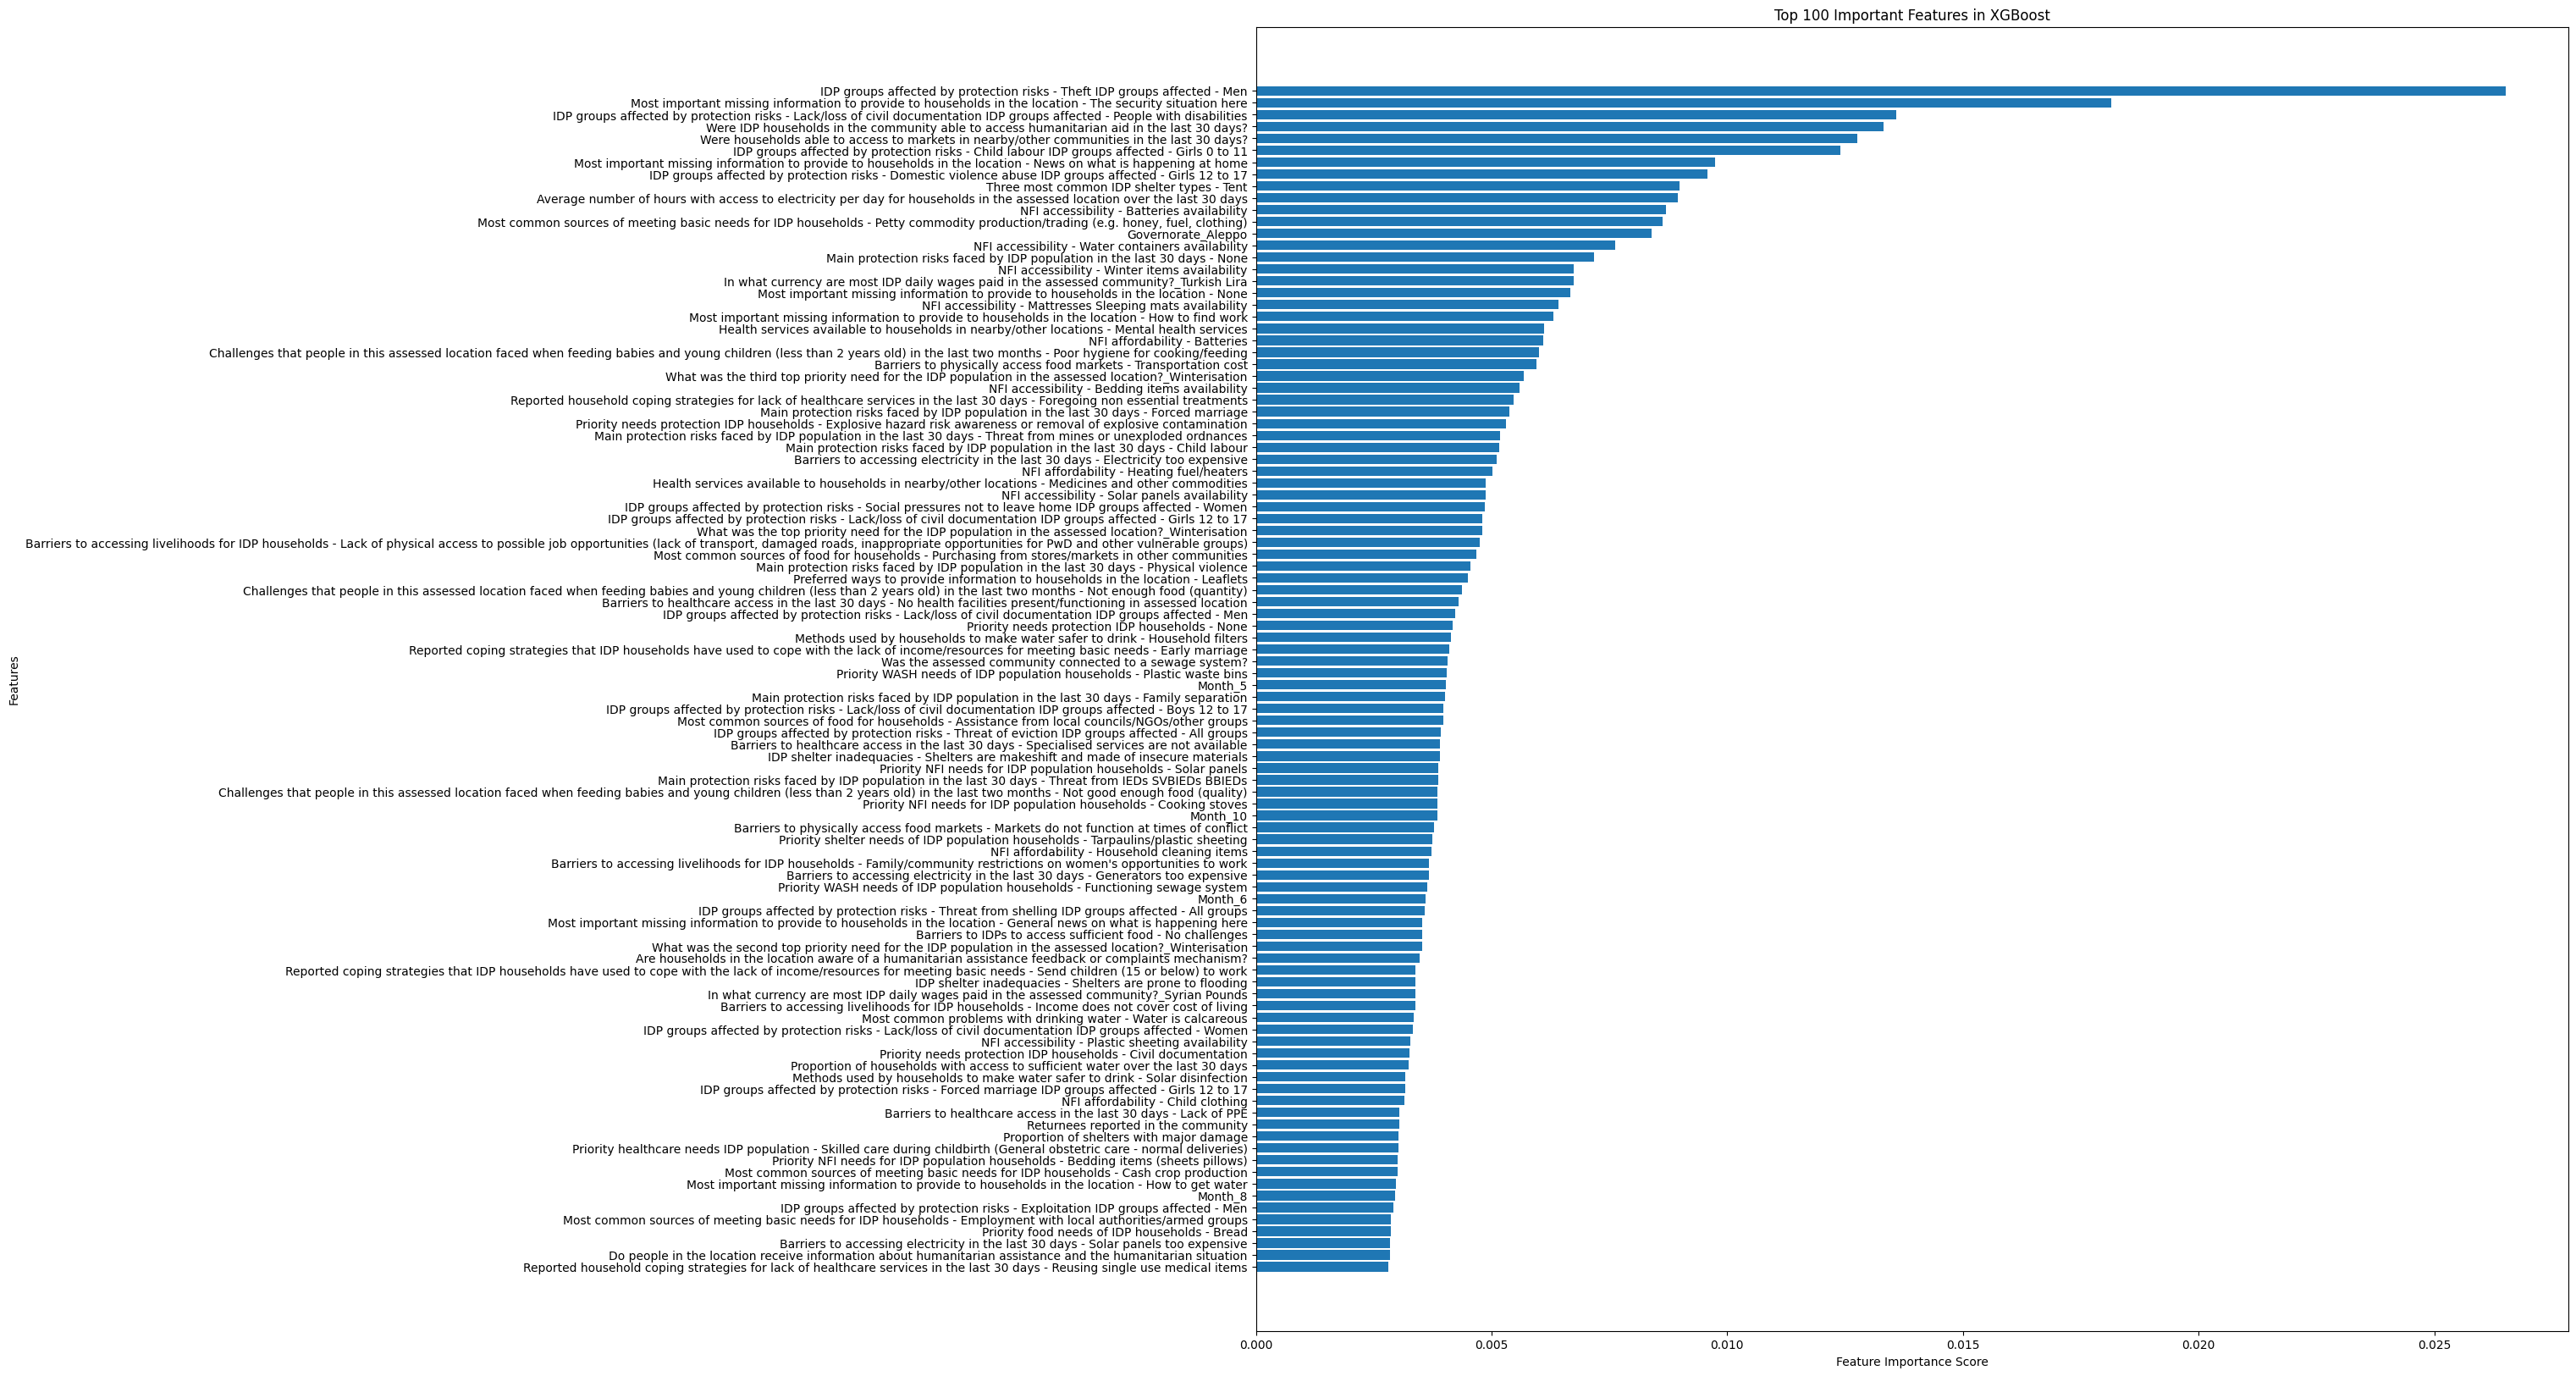

In [301]:
import matplotlib.pyplot as plt
# Get feature importances
feature_importance = best_xgb.estimators_[0].feature_importances_

# Convert to DataFrame
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Display top 100 most important features
print(importance_df.head(100))

# Plot feature importance
plt.figure(figsize=(20, 20))
plt.barh(importance_df["Feature"].head(100), importance_df["Importance"].head(100))
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 100 Important Features in XGBoost")
plt.gca().invert_yaxis()  # Reverse order to display highest at the top
plt.show()


## Important Feature

In [302]:
# Extract feature importances
feature_importance = best_xgb.estimators_[0].feature_importances_

# Convert to DataFrame and sort by importance
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Define importance thresholds
THRESHOLDS = [0.001, 0.005, 0.01]

# Dictionary to store selected features and results
models_results = {}

for threshold in THRESHOLDS:
    # Select features above the threshold
    selected_features = importance_df[importance_df["Importance"] >= threshold]["Feature"].tolist()
    
    print(f"Threshold: {threshold}, Number of selected features: {len(selected_features)}")  
    
    # Subset X_train and X_test based on selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Initialize XGBoost model
    xgb_selected = MultiOutputClassifier(
        XGBClassifier(
            learning_rate=0.1, max_depth=10, n_estimators=200, 
            use_label_encoder=False, eval_metric="logloss", random_state=1234, n_jobs=-1
        )
    )

    # Train model
    best_xgb_selected = xgb_selected.fit(X_train_selected, Y_train)

    # Predict
    Y_pred_xgb_selected = xgb_selected.predict(X_test_selected)

    # Evaluate model
    def evaluate_model(model_name, Y_test, Y_pred):
        return {
            "Hamming Loss": hamming_loss(Y_test, Y_pred),
            "F1-Score (Macro)": f1_score(Y_test, Y_pred, average="macro", zero_division=0),
            "F1-Score (Micro)": f1_score(Y_test, Y_pred, average="micro", zero_division=0),
            "Accuracy": accuracy_score(Y_test, Y_pred)
        }
    
    models_results[f"XGBoost (Thr: {threshold})"] = evaluate_model(f"XGBoost (Threshold {threshold})", Y_test, Y_pred_xgb_selected)

# Convert results to DataFrame and display
results_df = pd.DataFrame(models_results).T
print(results_df)


Threshold: 0.001, Number of selected features: 340
Threshold: 0.005, Number of selected features: 33
Threshold: 0.01, Number of selected features: 6
                      Hamming Loss  F1-Score (Macro)  F1-Score (Micro)  \
XGBoost (Thr: 0.001)      0.019615          0.580884          0.849219   
XGBoost (Thr: 0.005)      0.035024          0.419686          0.725623   
XGBoost (Thr: 0.01)       0.049484          0.088401          0.540550   

                      Accuracy  
XGBoost (Thr: 0.001)  0.780799  
XGBoost (Thr: 0.005)  0.674009  
XGBoost (Thr: 0.01)   0.615069  


# Model with 340 Features (0.001 Theshold)

In [303]:
# Define importance threshold
THRESHOLD_001 = 0.001  

# Select features above threshold (340 features)
selected_features_001 = importance_df[importance_df["Importance"] >= THRESHOLD_001]["Feature"].tolist()
X_train_selected_001 = X_train[selected_features_001]
X_test_selected_001 = X_test[selected_features_001]

# Initialize and Train XGBoost with Features
xgb_selected_001 = MultiOutputClassifier(
    XGBClassifier(
        learning_rate=0.1, max_depth=10, n_estimators=200, 
        use_label_encoder=False, eval_metric="logloss", random_state=1234, n_jobs=-1
    )
)

# Train the model
best_xgb_001 = xgb_selected_001.fit(X_train_selected_001, Y_train)



In [310]:
import joblib

joblib.dump(best_xgb_001, "best_xgb_340_features.pkl")


['best_xgb_340_features.pkl']

In [305]:
from sklearn.metrics import hamming_loss, accuracy_score, f1_score, classification_report

# Tahmin yap
Y_pred_xgb_001 = best_xgb_001.predict(X_test_selected_001)

# Değerlendirme metriklerini hesapla
print("\nXGBoost (Threshold: 0.001) - Evaluation Metrics:")
print(f"Hamming Loss: {hamming_loss(Y_test, Y_pred_xgb_001)}")
print(f"F1-Score (Macro): {f1_score(Y_test, Y_pred_xgb_001, average='macro', zero_division=0)}")
print(f"F1-Score (Micro): {f1_score(Y_test, Y_pred_xgb_001, average='micro', zero_division=0)}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_xgb_001)}")

# Classification Report (Her bir label için detaylı metrikler)
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_xgb_001, target_names=Y_test.columns, zero_division=0))



XGBoost (Threshold: 0.001) - Evaluation Metrics:
Hamming Loss: 0.019614917210998024
F1-Score (Macro): 0.5808836237817929
F1-Score (Micro): 0.8492190921033426
Accuracy: 0.7807990277988759

Classification Report:
                                                                       precision    recall  f1-score   support

                                                              Shelter       0.53      0.17      0.26        52
                                                               Health       0.92      0.91      0.92      1614
                                                                 NFIs       0.81      0.27      0.41        81
                                               Electricity assistance       0.84      0.46      0.59        46
                                                      Food, nutrition       0.89      0.94      0.91      2813
                                                Agricultural supplies       1.00      0.12      0.21        50
          

# SHAP

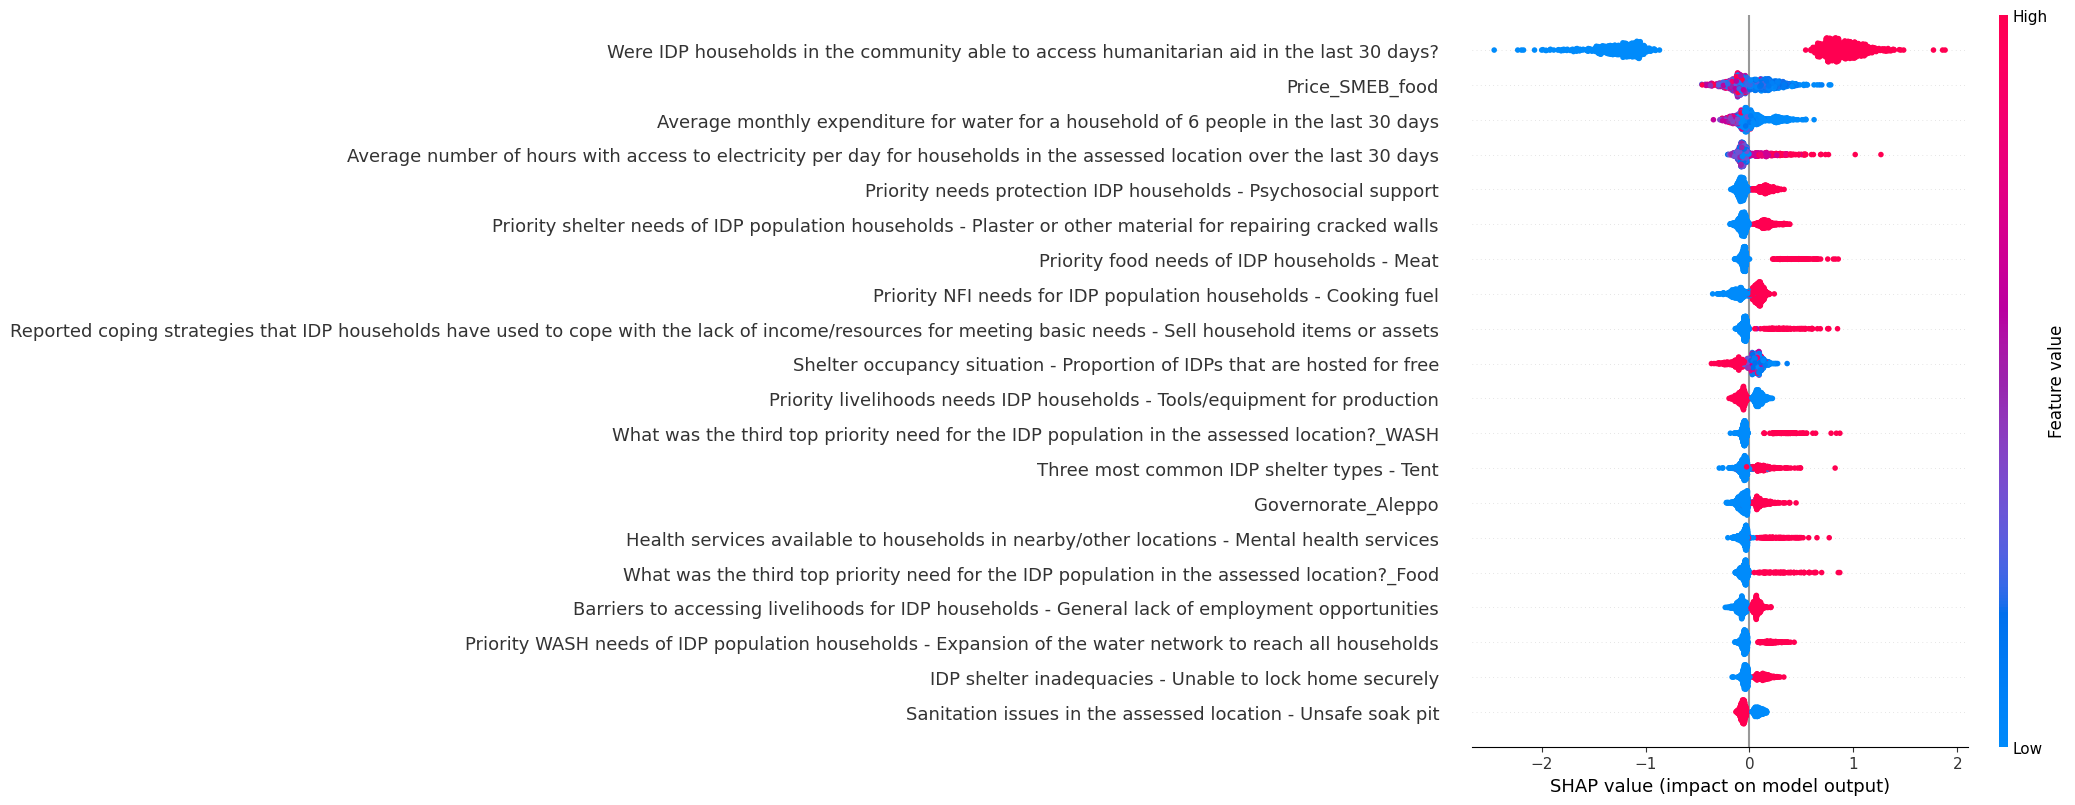

In [306]:
import shap

# Sample a subset to speed up computation (1000 samples from X_train)
X_sample = X_train.sample(1000, random_state=1234)

# Initialize SHAP explainer using the trained model and sampled data
explainer = shap.Explainer(best_xgb.estimators_[0], X_sample)

# Compute SHAP values
shap_values = explainer(X_sample)

# Plot feature importance summary using the same sample
shap.summary_plot(shap_values, X_sample)



100%|===================| 26234/26329 [04:15<00:00]        

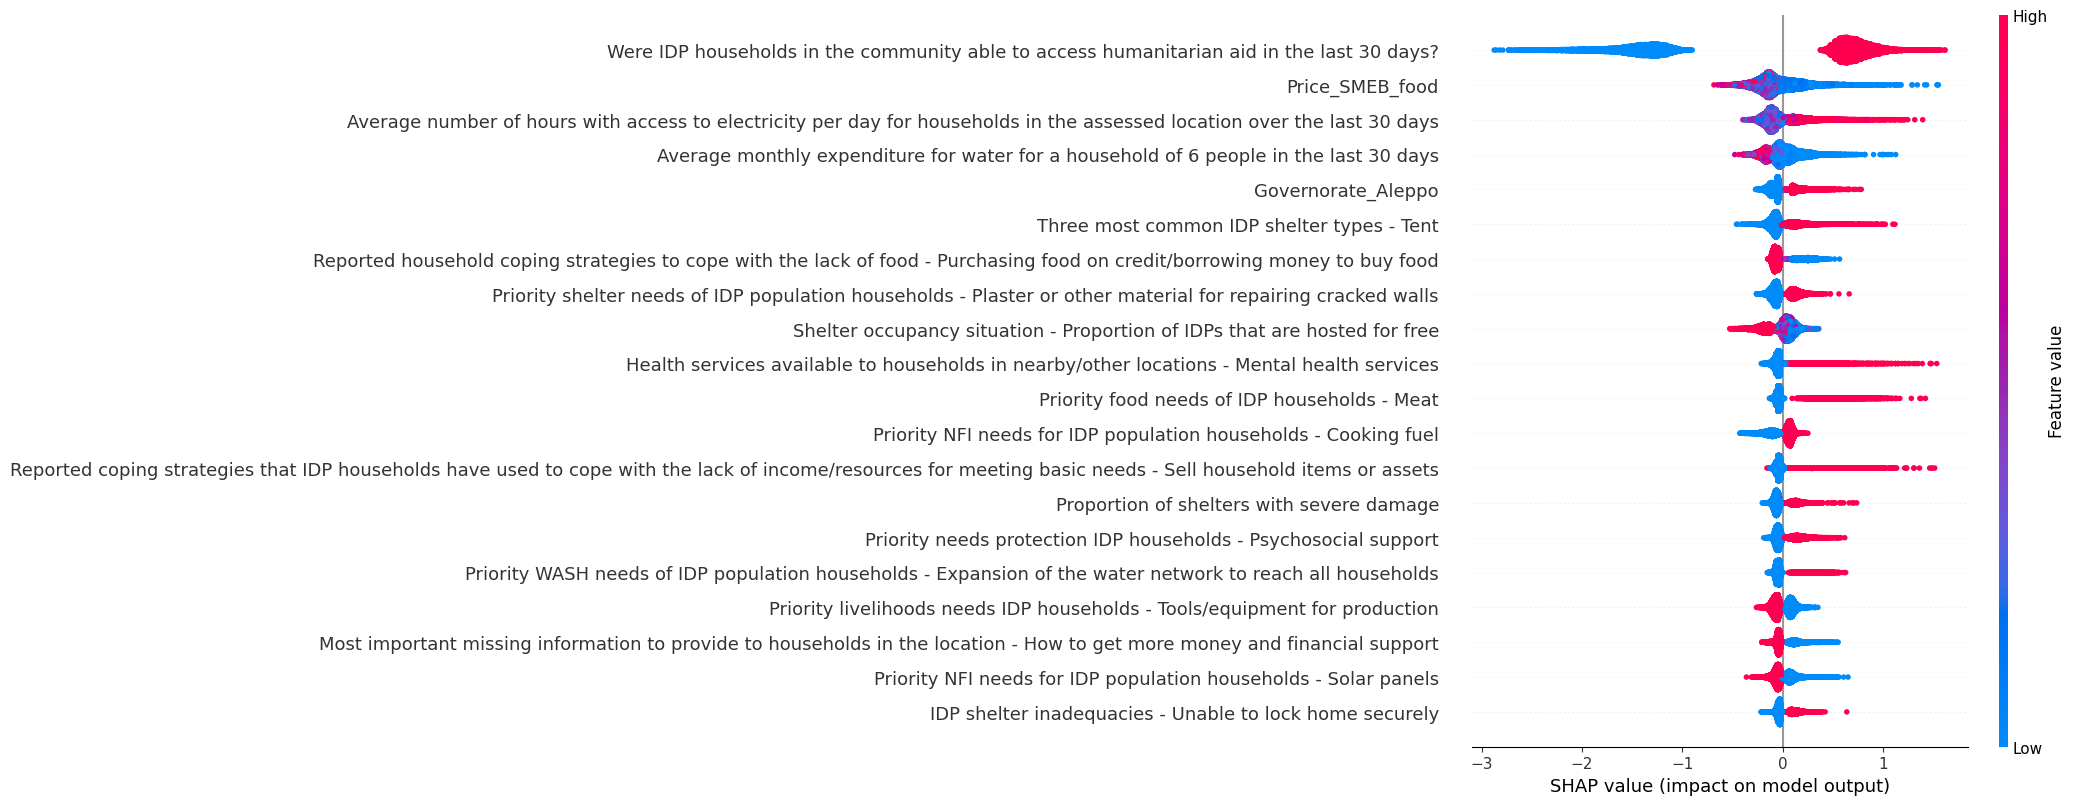

In [307]:
import shap

# Initialize SHAP explainer for 340-feature model
explainer_001 = shap.Explainer(best_xgb_001.estimators_[0], X_train_selected_001)

# Compute SHAP values
shap_values_001 = explainer_001(X_train_selected_001)

# Plot SHAP summary for features
shap.summary_plot(shap_values_001, X_train_selected_001)


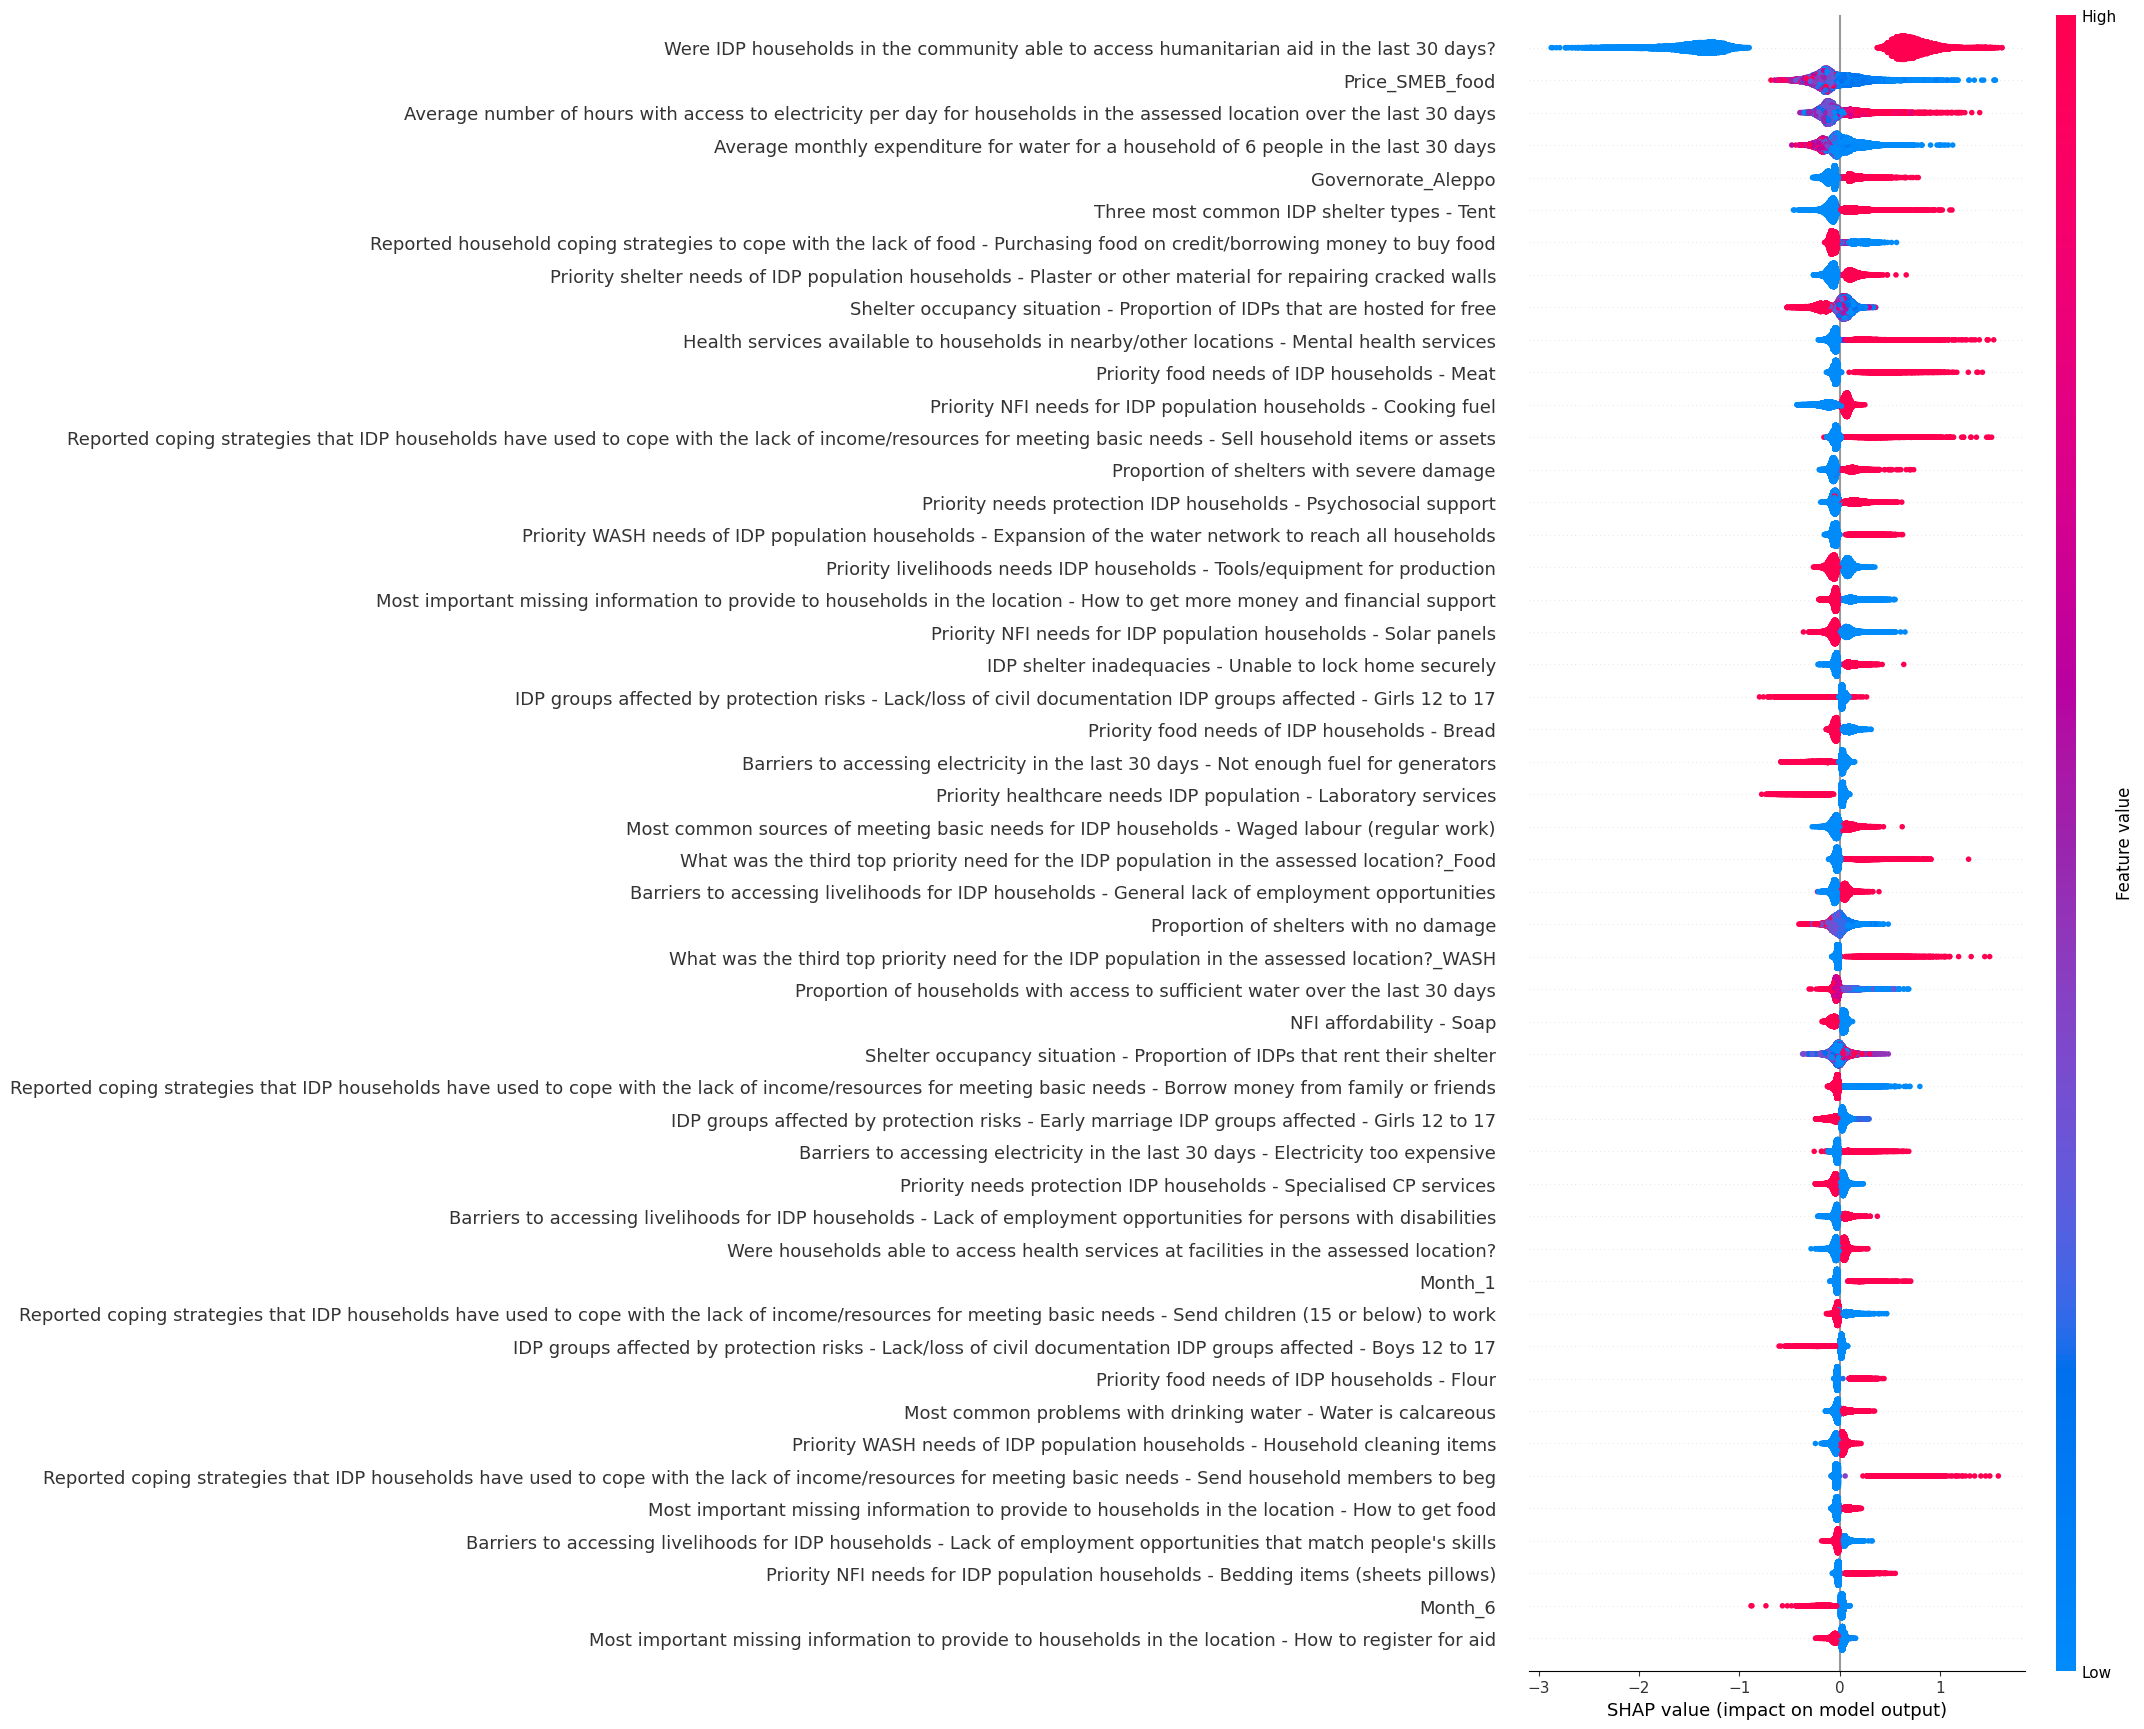

In [308]:
shap.summary_plot(shap_values_001, X_train_selected_001, max_display=50)  # Show top 50 features
